In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("online_coupon_sales.csv")

df.info()

df.head()

null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

df.fillna(df.median(numeric_only=True), inplace=True)

df.isnull().sum()

engagement_by_product = df.groupby('Product_Category')['Customer_Engagement'].mean().sort_values(ascending=False)
print(engagement_by_product)

coupon_usage_by_year = df.groupby(['Year', 'Coupon_Type'])['Usage_Count'].sum().unstack()
print(coupon_usage_by_year)

coupon_usage_by_product = df.groupby(['Product_Category', 'Coupon_Type'])['Usage_Count'].sum().unstack()
print(coupon_usage_by_product)

monthly_sales = df.groupby('Month')['Sales_Amount'].sum().sort_values(ascending=False)
print(monthly_sales)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          1000 non-null   int64  
 1   Product_Category     1000 non-null   object 
 2   Coupon_Type          1000 non-null   object 
 3   Year                 1000 non-null   int64  
 4   Month                1000 non-null   int64  
 5   Sales_Amount         1000 non-null   float64
 6   Usage_Count          1000 non-null   float64
 7   Customer_Engagement  1000 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 62.6+ KB
Customer_ID            0.0
Product_Category       0.0
Coupon_Type            0.0
Year                   0.0
Month                  0.0
Sales_Amount           0.0
Usage_Count            0.0
Customer_Engagement    0.0
dtype: float64
Product_Category
Electronics    54.279188
Beauty         53.063927
Home Decor     50.071429
Grocery  

C:\Users\tusha\AppData\Local\Temp\ipykernel_20136\275957695.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_product.index, y=engagement_by_product.values, palette="viridis")


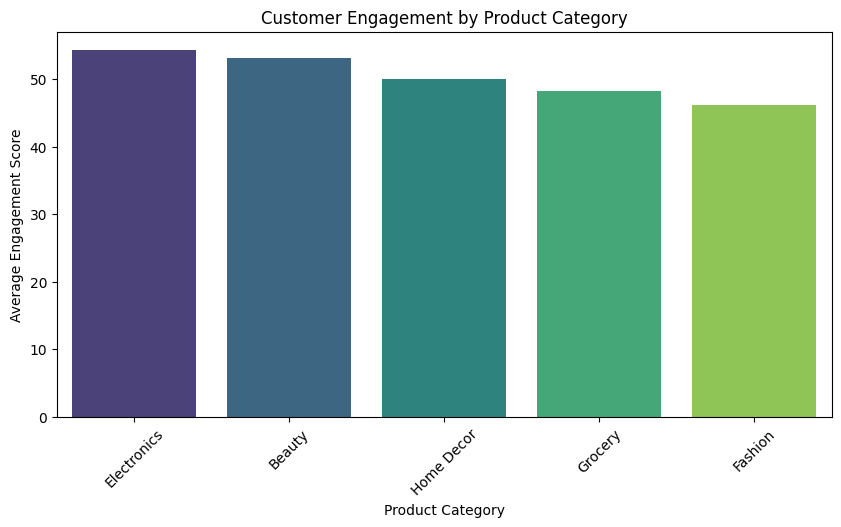

<Figure size 1200x600 with 0 Axes>

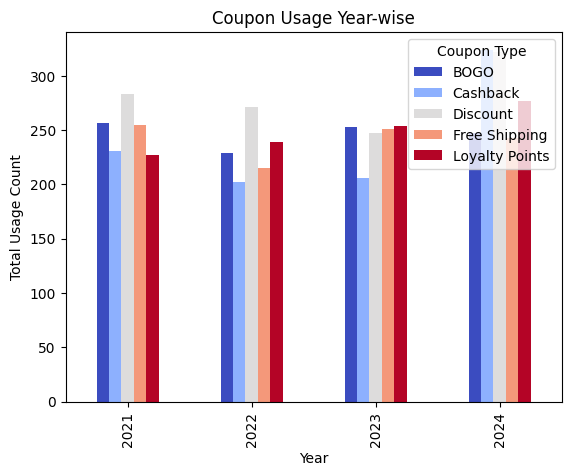

<Figure size 1200x600 with 0 Axes>

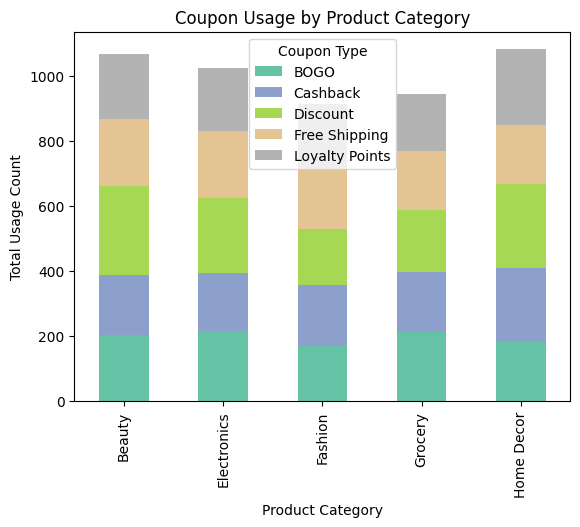

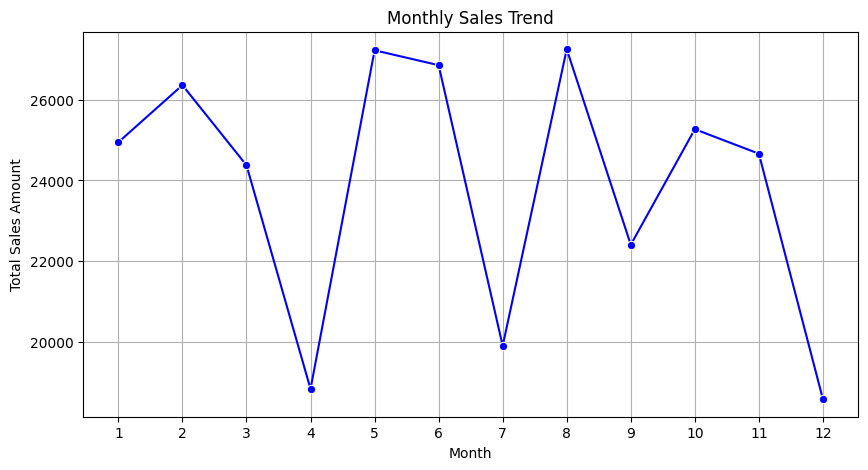

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_coupon_sales.csv")

df.fillna(df.median(numeric_only=True), inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(x=engagement_by_product.index, y=engagement_by_product.values, palette="viridis")
plt.title("Customer Engagement by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Engagement Score")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
coupon_usage_by_year.plot(kind="bar", colormap="coolwarm")
plt.title("Coupon Usage Year-wise")
plt.xlabel("Year")
plt.ylabel("Total Usage Count")
plt.legend(title="Coupon Type")
plt.show()

plt.figure(figsize=(12, 6))
coupon_usage_by_product.plot(kind="bar", stacked=True, colormap="Set2")
plt.title("Coupon Usage by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Usage Count")
plt.legend(title="Coupon Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()
